# <u color='blue'> Arima Time Series ForeCasting </u>
### AutoRegressive Integrated Moving Average:  It is a class of model that captures a suite of different standard temporal structures in time series data.


D:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


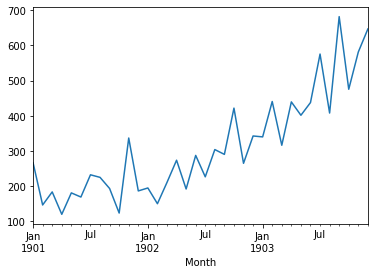

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('Data/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

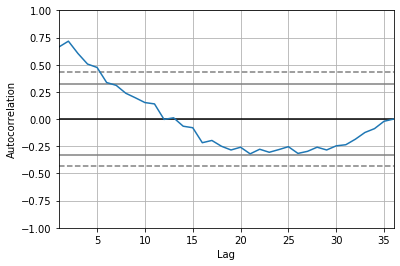

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

D:\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Downloads\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 01 Sep 2020   AIC                            406.340
Time:                        22:01:11   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

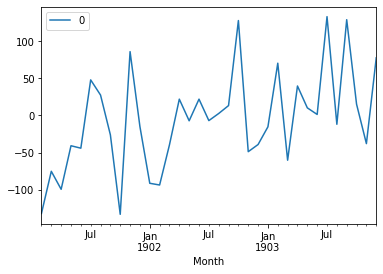

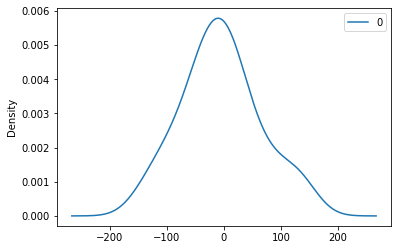

                0
count   35.000000
mean    -5.495216
std     68.132882
min   -133.296656
25%    -42.477819
50%     -7.186509
75%     24.748311
max    133.237940


In [8]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
 
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [10]:
series_pred = read_csv('Data/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series_pred.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000


NameError: name 'mean_squared_error' is not defined